## $A=U\cdot \Sigma\cdot V^T = \sum_{i=1}^k\sigma_ku_iv_i^T$

# Some applications of SVD

image compression, data compression, dimension reduction, background removal, recommendation system,...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from scipy import linalg

In [2]:
A=np.array([[2,5,4],[6,3,0],[6,3,0],[2,5,4]])
print(A)

[[2 5 4]
 [6 3 0]
 [6 3 0]
 [2 5 4]]


In [3]:
U,S,Vt = linalg.svd(A, full_matrices=1)

In [4]:
print(U);
print(S);
print(Vt);

[[-0.5       -0.5       -0.5292339 -0.4689472]
 [-0.5        0.5        0.4689472 -0.5292339]
 [-0.5        0.5       -0.4689472  0.5292339]
 [-0.5       -0.5        0.5292339  0.4689472]]
[1.20000000e+01 6.00000000e+00 5.63194856e-16]
[[-0.66666667 -0.66666667 -0.33333333]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.33333333 -0.66666667  0.66666667]]


In [5]:
print(A.shape)
print(U.shape)
print(Vt.shape)

(4, 3)
(4, 4)
(3, 3)


In [6]:
m=A.shape[0]
n=A.shape[1]
Sm=np.zeros(n*m).reshape(m,n)
for i in range(len(S)):
    Sm[i,i]=S[i]

In [7]:
np.allclose(U.dot(Sm.dot(Vt)),A);

In [8]:
Us,Ss,Vts=np.linalg.svd(A);

In [9]:
print(Us.shape);
print(Vts.shape);

(4, 4)
(3, 3)


In [10]:
np.allclose(A,Us@Sm@Vts);

## SVD on image compression

In [11]:
#path = "./data/"

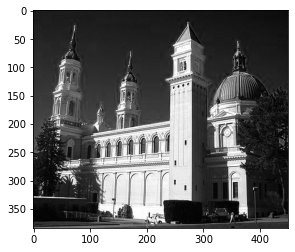

In [14]:
img = mpimg.imread('church.jpg')
I = img[:,:,0]
plt.imshow(I, cmap = 'gray')

In [13]:
I1=img[:,:,1]
I2=img[:,:,2]

In [14]:
img.shape

(384, 450, 3)

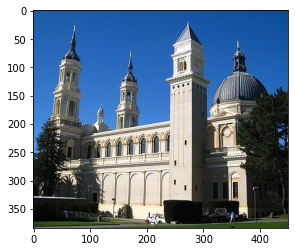

In [15]:
plt.imshow(img)

In [16]:
img[:,:,0].shape

(384, 450)

In [17]:
I = I.astype(float)

In [18]:
np.linalg.matrix_rank(I)

384

In [19]:
U,S,V = np.linalg.svd(I, full_matrices=0)

In [20]:
np.allclose(I, U@np.diag(S)@V)

True

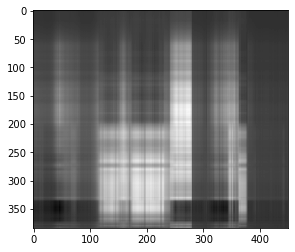

In [21]:
r = 2
plt.imshow(U[:,:r]@np.diag(S[:r])@V[:r,:], cmap = 'gray')

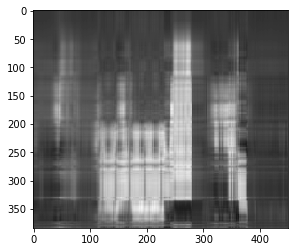

In [22]:
r = 5
plt.imshow(U[:,:r]@np.diag(S[:r])@V[:r,:], cmap = 'gray')

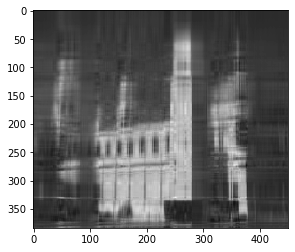

In [23]:
r = 10
plt.imshow(U[:,:r]@np.diag(S[:r])@V[:r,:], cmap = 'gray')

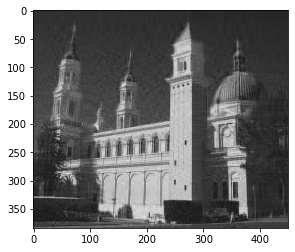

In [24]:
r = 50
plt.imshow(U[:,:r]@np.diag(S[:r])@V[:r,:], cmap = 'gray')

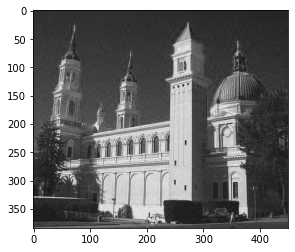

In [25]:
r = 100
plt.imshow(U[:,:r]@np.diag(S[:r])@V[:r,:], cmap = 'gray')

In [26]:
x=384*450
y=((384+450)*100)
print(x)
print(y)
print(y/x)

172800
83400
0.4826388888888889


In [27]:
U1,S1,V1 = np.linalg.svd(I1, full_matrices=0)
U2,S2,V2 = np.linalg.svd(I2, full_matrices=0)

In [28]:
r=100
ch1=U[:,:r]@np.diag(S[:r])@V[:r,:]/255.99
ch2=U1[:,:r]@np.diag(S1[:r])@V1[:r,:]/255.99
ch3=U2[:,:r]@np.diag(S2[:r])@V2[:r,:]/255.99

In [29]:
r100img=np.dstack((ch1,ch2,ch3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


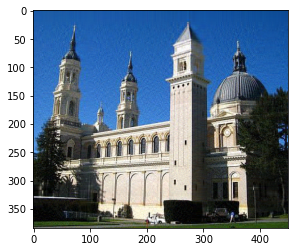

In [30]:
plt.imshow(r100img)

## Repeat with this image... What's a good lower rank approx? What's the compression ratio?

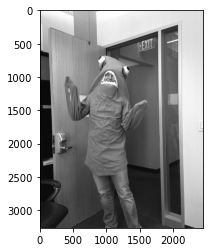

In [31]:
ham = mpimg.imread('grayshark.jpg')
plt.imshow(ham, cmap = 'gray')

In [32]:
U,st,V_T = linalg.svd(ham)

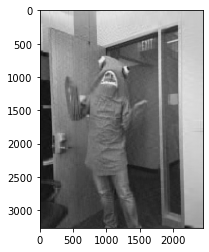

In [33]:
def img_red(r): 
    return U[:, :r] @ np.diag(st[:r]) @ V_T[:r, :]

plt.imshow(img_red(40), cmap = 'gray')

## Principal Component Analysis (PCA)

In [34]:
arrests=pd.read_csv('USArrests.csv')
arrests.columns=["State","Murder","Assault",'UrbanPop','Rape']
arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
narr=arrests[['Murder', 'Assault', 'UrbanPop', 'Rape']]
ncarr=(narr-narr.mean())/narr.std()
ncarr.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


In [36]:
from sklearn import decomposition
from scipy import linalg 

In [37]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(ncarr)

In [38]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [39]:
U,st,Vh = linalg.svd(ncarr)

In [40]:
print(U.shape)
print(st.shape)
print(Vh.shape)

(50, 50)
(4,)
(4, 4)


In [41]:
Vh

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [42]:
s=np.zeros(200).reshape(50,4)
for i in range(len(st)):
    s[i,i]=st[i]

In [43]:
np.allclose(ncarr,U.dot(s.dot(Vh)))

True

In [44]:
print(ncarr.shape)
print(Vh.shape)
print(U.shape)
scores=ncarr.dot(Vh.transpose())

(50, 4)
(4, 4)
(50, 50)


In [45]:
k=2
Uk=U[:,:k]
L=np.diag(st[:k])
Xk=Uk.dot(L)


In [46]:
df=pd.DataFrame(Xk,columns=['PC1','PC2'])
df['State']=arrests['State']

In [47]:
df.head(10)

,PC1,PC2,State
0,-0.975660,1.122001,Alabama
1,-1.930538,1.062427,Alaska
2,-1.745443,-0.738460,Arizona
3,0.139999,1.108542,Arkansas
4,-2.498613,-1.527427,California
5,-1.499341,-0.977630,Colorado
6,1.344992,-1.077984,Connecticut
7,-0.047230,-0.322089,Delaware
8,-2.982760,0.038834,Florida
9,-1.622807,1.266088,Georgia


### Easier to read if make positive:

In [48]:
df['PC1']=(-1)*df['PC1']
df['PC2']=(-1)*df['PC2']

In [49]:
df.head(10)

,PC1,PC2,State
0,0.975660,-1.122001,Alabama
1,1.930538,-1.062427,Alaska
2,1.745443,0.738460,Arizona
3,-0.139999,-1.108542,Arkansas
4,2.498613,1.527427,California
5,1.499341,0.977630,Colorado
6,-1.344992,1.077984,Connecticut
7,0.047230,0.322089,Delaware
8,2.982760,-0.038834,Florida
9,1.622807,-1.266088,Georgia


In [50]:
PCs=Vh.transpose()
-1*PCs[:,:2]

array([[ 0.53589947, -0.41818087],
       [ 0.58318363, -0.1879856 ],
       [ 0.27819087,  0.87280619],
       [ 0.54343209,  0.16731864]])

In [51]:
arrests.columns[1:]

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## % variance explained by first two PCs

In [52]:
(st[0]+st[1])/(sum(st))

0.7171403202900464

### Connection with covariance matrix?

In [53]:
ncarr.shape

(50, 4)

## Compute the covariance matrix and diagonalize it. Explain the connection with PCA.

In [54]:
cvarr=ncarr.transpose().dot(ncarr)/49
print(cvarr)

            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


In [55]:
e,Q = linalg.eigh(cvarr)

In [56]:
np.allclose(cvarr,Q.dot(np.diag(e)).dot(Q.transpose()))

True

In [57]:
-Q

array([[-0.6492278 ,  0.34123273, -0.41818087,  0.53589947],
       [ 0.74340748,  0.26814843, -0.1879856 ,  0.58318363],
       [-0.13387773,  0.37801579,  0.87280619,  0.27819087],
       [-0.08902432, -0.81777791,  0.16731864,  0.54343209]])

## try PCA on NBA players data

In [58]:
pl=pd.read_csv('nba_players.csv')
del pl['Unnamed: 29']
del pl['Rk']
pl=pl[['Player','Age', 'G', 'GS', 'MP▼', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'ORtg', 'DRtg']]

pl.columns=['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'ORtg', 'DRtg']
pl.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,Bradley Beal\bealbr01,25,82,82,3028,11.9,25.2,0.475,3.3,9.3,...,5.0,6.4,7.0,1.9,0.9,3.5,3.5,32.8,113.0,114
1,James Harden\hardeja01,29,78,78,2867,14.4,32.7,0.442,6.5,17.6,...,7.7,8.9,10.0,2.7,1.0,6.6,4.2,48.2,118.0,108
2,Kemba Walker\walkeke02,28,82,82,2863,12.4,28.6,0.434,4.4,12.4,...,5.2,6.1,8.2,1.7,0.6,3.6,2.2,35.7,112.0,114
3,Tobias Harris\harrito02,26,82,82,2847,10.1,20.8,0.487,2.6,6.5,...,9.6,10.7,3.8,0.8,0.6,2.5,3.1,27.3,114.0,111
4,Paul George\georgpa01,28,77,77,2841,11.6,26.5,0.438,4.8,12.4,...,8.6,10.3,5.2,2.8,0.6,3.4,3.5,35.5,116.0,105


In [59]:
pl['Player']=pl['Player'].str.split("\\").str[0]

## These are rate stats, i.e., per 100 possessions (<--ignorable if desired) 
(G,GS,MP are raw)

In [60]:
pl.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,Bradley Beal,25,82,82,3028,11.9,25.2,0.475,3.3,9.3,...,5.0,6.4,7.0,1.9,0.9,3.5,3.5,32.8,113.0,114
1,James Harden,29,78,78,2867,14.4,32.7,0.442,6.5,17.6,...,7.7,8.9,10.0,2.7,1.0,6.6,4.2,48.2,118.0,108
2,Kemba Walker,28,82,82,2863,12.4,28.6,0.434,4.4,12.4,...,5.2,6.1,8.2,1.7,0.6,3.6,2.2,35.7,112.0,114
3,Tobias Harris,26,82,82,2847,10.1,20.8,0.487,2.6,6.5,...,9.6,10.7,3.8,0.8,0.6,2.5,3.1,27.3,114.0,111
4,Paul George,28,77,77,2841,11.6,26.5,0.438,4.8,12.4,...,8.6,10.3,5.2,2.8,0.6,3.4,3.5,35.5,116.0,105


In [61]:
pl.isnull().sum()

Player     0
Age        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        4
3P         0
3PA        0
3P%       36
2P         0
2PA        0
2P%       10
FT         0
FTA        0
FT%       27
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
ORtg       4
DRtg       0
dtype: int64

In [62]:
pl[['2PA','3PA']][(pl['2P%'].isna())|(pl['3P%'].isna())].head()

,2PA,3PA
22,13.2,0.0
62,16.0,0.0
95,10.6,0.0
206,10.3,0.0
222,11.1,0.0


## Might make sense to filter on MP

In [63]:
pl['MP'].describe()

count     530.000000
mean     1121.618868
std       838.657750
min         1.000000
25%       323.500000
50%      1069.000000
75%      1836.500000
max      3028.000000
Name: MP, dtype: float64

In [64]:
plm=pl[pl['MP']>=323.5]

In [65]:
plm.shape

(397, 28)

In [66]:
plm = plm.fillna(0)


In [ ]:
plm

## SVD

In [92]:
plmsvd = plm.loc[:, ~plm.columns.isin(['Player', 'Age', "MP"])]
plmsvd=(plmsvd-plmsvd.mean())/plmsvd.std()


In [93]:
plmsvd.columns

Index(['G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

In [94]:
U, st, V_T = linalg.svd(plmsvd)
r = 1
Xk = U[:, :r] @ np.diag(st[:r])
df=pd.DataFrame(Xk,columns=['PC1'])
df['Player']=plm["Player"]
player_ranks = df.sort_values(by = "PC1", ascending=False)
player_ranks

,PC1,Player
370,5.113168,Sviatoslav Mykhailiuk
348,5.106568,Álex Abrines
373,4.667064,Jaylen Adams
144,4.504711,Darius Miller
392,4.460915,Channing Frye
...,...,...
13,-7.681474,Andre Drummond
80,-7.854015,Joel Embiid
22,-8.092704,Rudy Gobert
158,-8.480682,Hassan Whiteside


In [70]:
plmsvd.isnull().any()

Age     False
G       False
GS      False
MP      False
FG      False
FGA     False
FG%     False
3P      False
3PA     False
3P%     False
2P      False
2PA     False
2P%     False
FT      False
FTA     False
FT%     False
ORB     False
DRB     False
TRB     False
AST     False
STL     False
BLK     False
TOV     False
PF      False
PTS     False
ORtg    False
DRtg    False
dtype: bool